<a href="https://colab.research.google.com/github/madhuranga84/COVID19_SRI_LANKA_Studies/blob/master/COVID19_SRI_LANKA_SIR_MODELING_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR modeling for Sri Lankan COVID 19 situation

##Disclaimer:
* ***Data used for the analysis belongs to each individual organization (sourced here) and they are used here for an educational purpose. Copy rights of the data belongs to the original organizations!***

* ***This analysis is carried out only for educational purposes and please update and adhere to the rules and regulations imposed by  Sri Lankan health officials and all related authorities.*** 

##Abstract
This is an attempt to make an initial level mathematical modeling for understanding the prevailing trend (and to predict the direction towards the future) in the spreading of COVID 19 virus across Sri Lanka. There has been a huge rise in the recorded number of cases within the country within a period of **ONE week(08/03/2020 - 15/03/2020)** and if no strict decisions made from the government side and having show no abideness from the public towards the government orders could make things worse. Thus, we encourage our public to abide by the laws and regulations that are implemented by the government to prevent this virus pandemic.

## The S-I-R model

S-I-R model is a major mathematical model used in modeling pandemics[1][2]. There are four major components that can be identified in this model,

N(t) = Total population  
S(t) = Number of ***SUSEPTIBLE*** people in the population(not infected yet)  
I(t) = Number of ***INFECTED*** people in the population  
R(t) = Number of ***RECOVERED*** people in the population  

such that, N(t)=S(t)+I(t)+R(t) 

We can begin to model the pandemic situation by taking the rate of change w.r.t to time of above given parameters and their time derivtives are as follows. 


*   $\frac{dS}{dt} = -\alpha SI$  
*   $\frac{dI}{dt} = \alpha SI - \beta I$  
*   $\frac{dR}{dt} = \beta I$  

There are two constants involved here,

* $\alpha \rightarrow$ Transmision(contact) rate: Rate at which the virus can spread (from an infected individual to the suseptible ploulation). For our analysis, taking the following steps implemented by the government in to account, we can set the $\alpha = 0.001$ (This is a generalized model for whole Sri Lanka. The model can be adopted to each district and accordingly, $\alpha$ can be vary based on the region of interest. As an example, $\alpha$ can have a higher value for the **Puttalama district** as some people haven't been accountable in handing them to authorities or going in self-quarantine) 

>> * Shutting down the Bandaranaike International Airport
>> * Imposing curfue 
>> * Providing sanitation facilities at public places
>> * Sanitizing public trnsport
>> * Admitting foreign arrivals in to quarantine camps

* $\beta \rightarrow$: Recovery rate (based on the time imposed by the health officials to quarantine the infected people to conatin the spread) we can take this rate as $\beta = \frac{1}{14}$ $\approx = 0.07143$(in terms of 14 days-2 weeks)

##Let's now try to model the senario in Sri Lanka based on the latest(based on data collected by 19/03/2020) data.

sources:
* https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv

* https://www.worldometers.info/coronavirus/

For the analysis, we can have our parameters to have the following valus as their intial values,

* N: 21 million $\rightarrow 21x10^{6}$  
* S(0): $21x10^{6} - 51 - 2 \approx 21x10^{6}$  
* I(0): 51  
* R(0): 2(excluding the Chinese individual)  

As several important events in the country are to be expected in the comming few months (Sinhala new year, Wesak poya, Poson poya, 2020 general election) let's make the model to predict the senario for 120 days from now

In [0]:
#Import analysis modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *

In [0]:
#Declare Initial conditions
N = 100000 #21000000
I0 = 73
R0 = 2
S0 = N - I0 - R0
#alpha = 0.001
alpha = 0.005 
beta = 0.07143 #1/14days
t = np.linspace(0,120,120)


In [0]:
#Define the function to evaluate the differential equations in the SIR model

def derivative(v,t,N,alpha, beta):
  S, I, R = v #this is the vector storing S,I,R information
  dSdt = -(alpha*S*I)/N
  dIdt = (alpha*S*I)/N - (beta*I)
  dRdt = (beta*I)
  return dSdt, dIdt, dRdt

# vector storing the initial conditions
v0 = S0, I0, R0

In [0]:
#Starting from the intial conditions, now integrate over 120 days
integral = odeint(derivative, v0, t, args=(N, alpha, beta))
#print(integral)
S, I, R = integral.T

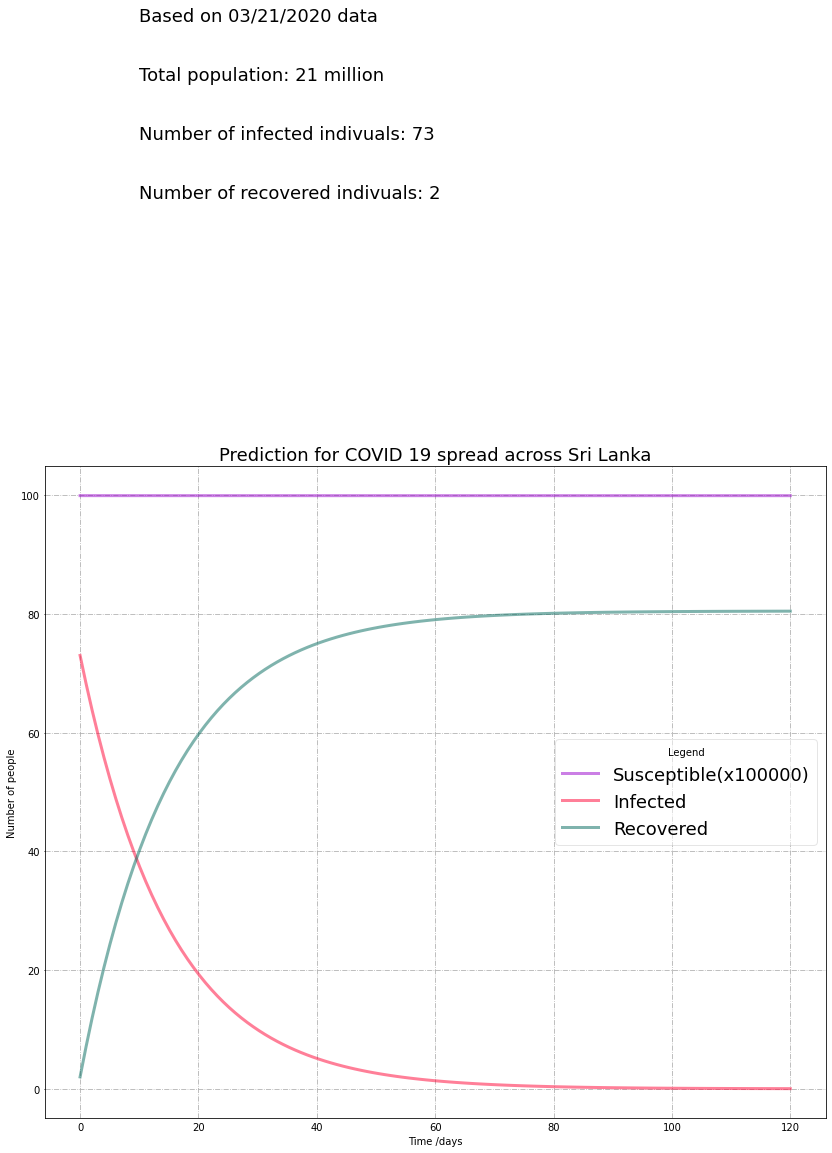

In [0]:
fig = plt.figure(facecolor='w', figsize=(14, 12))
ax = fig.add_subplot(111, axisbelow=True)
ax.grid(True, linestyle='-.')
ax.plot(t, S/1000, color='#9900CC', alpha=0.5, lw=3, label='Susceptible(x100000)')
ax.plot(t, I, color='#FF0033', alpha=0.5, lw=3, label='Infected')
ax.plot(t, R, color='#00695C', alpha=0.5, lw=3, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of people')
ax.set_title('Prediction for COVID 19 spread across Sri Lanka', fontsize=18)
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.text(10,180,'Based on 03/21/2020 data',fontsize=18)
ax.text(10,170,'Total population: 21 million',fontsize=18)
ax.text(10,160,'Number of infected indivuals: 73',fontsize=18)
ax.text(10,150,'Number of recovered indivuals: 2',fontsize=18)
legend = ax.legend(loc='best', title="Legend", fontsize=18)
legend.get_frame().set_alpha(0.5)
plt.show()

# Conclusion

If our general public can adhere to the instructions provided by the health officials, we can manage to cope the situation within (MAY BE) approximately 40 days from 03/18/2020, which is around the first week of May. For that, our government must implement strick measures to make sure that the virus has a minimum chance to propagate.

## Asuming if only 1/3 of the total population is suceptible(at same $\alpha$ and $\beta$)

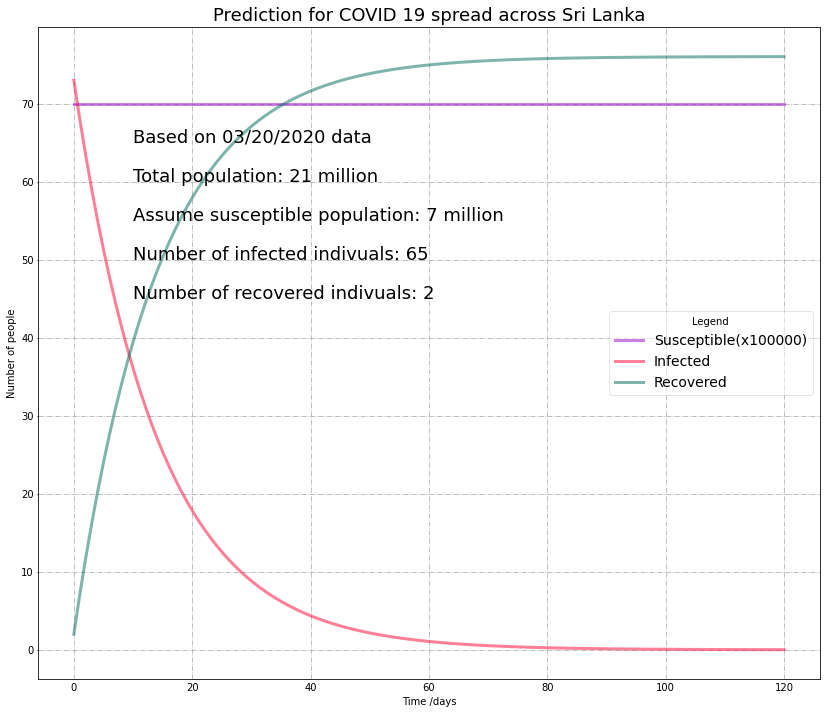

In [0]:
#Declare Initial conditions for 1/3 of population
N1 = 21000000./3
I0 = 73
R0 = 2
S0 = N1 - I0 - R0
alpha = 0.001 
beta = 0.07143 #1/14days
t = np.linspace(0,120,120)

#Define the function to evaluate the differential equations in the SIR model

def derivative(v,t,N1,alpha, beta):
  S, I, R = v #this is the vector storing S,I,R information
  dSdt = -(alpha*S*I)/N1
  dIdt = (alpha*S*I)/N1 - (beta*I)
  dRdt = (beta*I)
  return dSdt, dIdt, dRdt

# vector storing the initial conditions
v0 = S0, I0, R0

#Starting from the intial conditions, now integrate over 120 days
integral = odeint(derivative, v0, t, args=(N1, alpha, beta))
#print(integral)
S, I, R = integral.T

fig = plt.figure(facecolor='w', figsize=(14, 12))
ax = fig.add_subplot(111, axisbelow=True)
ax.grid(True, linestyle='-.')
ax.plot(t, S/100000, color='#9900CC', alpha=0.5, lw=3, label='Susceptible(x100000)')
ax.plot(t, I, color='#FF0033', alpha=0.5, lw=3, label='Infected')
ax.plot(t, R, color='#00695C', alpha=0.5, lw=3, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of people')
ax.set_title('Prediction for COVID 19 spread across Sri Lanka', fontsize=18)
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.text(10,65,'Based on 03/20/2020 data',fontsize=18)
ax.text(10,60,'Total population: 21 million',fontsize=18)
ax.text(10,55,'Assume susceptible population: 7 million',fontsize=18)
ax.text(10,50,'Number of infected indivuals: 65',fontsize=18)
ax.text(10,45,'Number of recovered indivuals: 2',fontsize=18)
legend = ax.legend(loc='best', title="Legend", fontsize=14)
legend.get_frame().set_alpha(0.5)
plt.show()

# Conclusion

Assuming the susceptible population is approximately 7 million people(considering in to the dense population close by to Colombo metropolitan), even within current measurements **MAY TAKE** approximately 60 days from 03/18/2020 which is practically 2 months

# Overall conclusion

COVID19 outbreak **MUST NOT** be taken light at any moment untill our health officials officially declare so. Please follow the instructions they have already provided and some important of such can be listed as follows.

* Watch news and update yourself with the latest instructions
* If you have any doubt on either of yours or your family member(s) having experiencing the declared symptoms, please admit to the nearest government hospital.
* Restrict your traveling except for essentials
* Keep at least 1m distance from other individuals
* Go back to saying Ayubowan/Vanakkam
* Wash your hand for atleast 20 seconds, do so regularly through out the day(hand sanitizers could help as well)

## Read these materials

> Ministry of Health: http://www.health.gov.lk/moh_final/english/news_read_more.php?id=843
>> * Epidemilogy unit: http://www.epid.gov.lk/web/index.php?lang=si

> World Health Organization: https://www.who.int/emergencies/diseases/novel-coronavirus-2019
>> * Coronavirus disease (COVID-19) advice for the public: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public 




# References

* David J.D. Earn, A Light Introduction to Modelling Recurrent Epidemics  
https://mysite.science.uottawa.ca/rsmith43/MAT4996/earn.pdf

* Mimmo Iannelli, THE MATHEMATICAL MODELING OF EPIDEMICS  
http://itech.fgcu.edu/faculty/pfeng/teaching/epidemics.pdf

* Learning Scientific Programming with Python by Christian Hill  
https://scipython.com/book/
>> https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Data sources

* The Humanitarian Data Exchange: https://data.humdata.org  
>> * https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases/resource/4cd2eaa1-fd3e-4371-a234-a8ef2b44cc1f

* Worldometers: https://www.worldometers.info  
>> * https://www.worldometers.info/coronavirus/